# (Bay Wheels Data Exploration) by Ameen

## Investigation Overview

> This document explores a dataset containing trip durations, stations, and user information for approximately 520,000 trips in 2017. The goal is to present findings and results based on questions asked while exploring the dataset in three stages after datat wranlging: Univariate Exploration, Bivariate Exploration, and Multivariate Exploration.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe called trip_data
trip_data = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# display the complete column text values
pd.set_option('display.max_colwidth', -1)

# print data shape and data types of trip_data and dispaly the head of 5 rows
print(trip_data.shape)
print(trip_data.dtypes)
trip_data.head(5)

(519700, 15)
duration_sec               int64  
start_time                 object 
end_time                   object 
start_station_id           int64  
start_station_name         object 
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int64  
end_station_name           object 
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64  
user_type                  object 
member_birth_year          float64
member_gender              object 
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde St),37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at 3rd St),37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [4]:
# dispaly the tail of 5 rows
trip_data.tail(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,1991.0,Male
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,1973.0,Male
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,1985.0,Female
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,1981.0,Male
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,1984.0,Male


In [5]:
# display statistics
trip_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [6]:
# display the number of unique values in each column
trip_data.nunique()

duration_sec               13490 
start_time                 519688
end_time                   519681
start_station_id           272   
start_station_name         272   
start_station_latitude     272   
start_station_longitude    272   
end_station_id             272   
end_station_name           272   
end_station_latitude       272   
end_station_longitude      272   
bike_id                    3673  
user_type                  2     
member_birth_year          73    
member_gender              3     
dtype: int64

In [7]:
# print the unique values for some columns, mainly the categorical
print(trip_data['start_station_name'].unique())
print(trip_data['user_type'].unique())
print(trip_data['member_birth_year'].unique())
print(trip_data['member_gender'].unique())

['Laguna St at Hayes St'
 'Yerba Buena Center for the Arts (Howard St at 3rd St)'
 'Downtown Berkeley BART' '8th St at Ringold St'
 'Bancroft Way at Telegraph Ave'
 'San Francisco Caltrain (Townsend St at 4th St)'
 'Addison St at Fourth St'
 'Mechanics Monument Plaza (Market St at Bush St)'
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)'
 '3rd St at Townsend St' 'Clay St at Battery St' 'Folsom St at 9th St'
 'Cyril Magnin St at Ellis St' 'San Salvador St at 9th St'
 'Garfield Square (25th St at Harrison St)'
 'The Embarcadero at Sansome St' 'Broadway at Kearny'
 'S Park St at 3rd St' 'California St at University Ave'
 'Frank H Ogawa Plaza' 'Dolores St at 15th St' 'The Alameda at Bush St'
 '19th Street BART Station' 'Valencia St at 16th St'
 'Post St at Kearny St' 'San Francisco City Hall (Polk St at Grove St)'
 'Church St at Duboce Ave' '19th St at Florida St'
 'Russell St at College Ave' 'The Embarcadero at Vallejo St'
 '5th St at Howard St' 'Market St at 10th St' 'Valenc

In [8]:
# check the sum of null values in all columns of trip_data
trip_data.isnull().sum()

duration_sec               0    
start_time                 0    
end_time                   0    
start_station_id           0    
start_station_name         0    
start_station_latitude     0    
start_station_longitude    0    
end_station_id             0    
end_station_name           0    
end_station_latitude       0    
end_station_longitude      0    
bike_id                    0    
user_type                  0    
member_birth_year          66541
member_gender              66462
dtype: int64

In [9]:
# check the sum of any duplicated rows
trip_data.duplicated().sum()

0

#### Quality Issues
* trip_data should be cleaned first before moving to exploration through data visualization
* following are quality issues found through data gathering and assessment
    * 1. bike_id, start_station_id, and end station_id columns types should be converted from integer to float
    * 2. unnecessary columns should be dropped: start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude
    * 3. member_birth_year column contains 66,541 null values and member_gender column contains 66,462 null values, they should be removed
    * 4. start_time and end_time columns types should be converted from object to datetime
    * 5. member_birth_year column type should be converted from float to integer
    * 6. member_birth_year column's minimum value is 1886 which realistically should be changed to 1986
    * 7. member_birth_year column contain values as years, it should renamed to member_age and the values should be calculated

In [10]:
# create a copy of the original dataframe called trip_data_clean
trip_data_clean = trip_data.copy()

#### Define
* 1. bike_id, start_station_id, and end station_id columns types should be converted from integer to float

#### Code

In [11]:
# convert the data type of the listed columns to float
trip_data_clean['bike_id'] = trip_data_clean['bike_id'].astype(float)
trip_data_clean['start_station_id'] = trip_data_clean['start_station_id'].astype(float)
trip_data_clean['end_station_id'] = trip_data_clean['end_station_id'].astype(float)
pd.options.display.float_format = '{:,.0f}'.format

#### Test

In [12]:
# check the data type of start_time and end_time columns
trip_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null float64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null float64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null float64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(8), int64(1), object(6)
memory usage: 59.5+ MB


#### Define
* 2. unnecessary columns should be dropped: start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, start_station_name, end_station_name

#### Code

In [13]:
# drop the listed columns from trip_data_clean
trip_data_clean = trip_data_clean.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'start_station_name', 'end_station_name']);

#### Test

In [14]:
# check the names of the columns
trip_data_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'end_station_id', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender'],
      dtype='object')

#### Define
* 3. member_birth_year column contains 66,541 null values and member_gender column contains 66,462 null values, they should be removed

#### Code

In [15]:
# drop rows with null values in trip_data_clean
trip_data_clean.dropna(inplace=True)

#### Test

In [16]:
# check the sum of null values in all columns of trip_data_clean
trip_data_clean.isnull().sum()

duration_sec         0
start_time           0
end_time             0
start_station_id     0
end_station_id       0
bike_id              0
user_type            0
member_birth_year    0
member_gender        0
dtype: int64

#### Define
* 4. start_time and end_time columns types should be converted from object to datetime

#### Code

In [17]:
# convert the data type of the listed columns to datetime
trip_data_clean['start_time'] = pd.to_datetime(trip_data_clean['start_time'])
trip_data_clean['end_time'] = pd.to_datetime(trip_data_clean['end_time'])

#### Test

In [18]:
# check the data type of start_time and end_time columns
trip_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 9 columns):
duration_sec         453159 non-null int64
start_time           453159 non-null datetime64[ns]
end_time             453159 non-null datetime64[ns]
start_station_id     453159 non-null float64
end_station_id       453159 non-null float64
bike_id              453159 non-null float64
user_type            453159 non-null object
member_birth_year    453159 non-null float64
member_gender        453159 non-null object
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 34.6+ MB


#### Define
* 5. member_birth_year column type should be converted from float to integer

#### Code

In [19]:
# convert the data type of the member_birth_year column to integer
trip_data_clean['member_birth_year'] = trip_data_clean['member_birth_year'].astype('int64')

#### Test

In [20]:
# check the data type of member_birth_year column
trip_data_clean.member_birth_year.dtypes

dtype('int64')

#### Define
* 6. member_birth_year column's minimum value is 1886 which realistically should be changed to 1986

#### Code

In [21]:
# display rows with value 1886 in column member_birth_year
trip_data_clean.loc[trip_data_clean['member_birth_year'] == 1886]

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender
425817,2546,2017-08-19 17:47:32.110,2017-08-19 18:29:58.825,197,172,"1,448",Customer,1886,Male
426608,1767,2017-08-19 13:20:02.170,2017-08-19 13:49:29.735,235,197,91,Customer,1886,Male


In [22]:
# change values 1886 in column member_birth_year to 1986
trip_data_clean['member_birth_year'].replace(1886, 1986,inplace=True)

#### Test

In [23]:
# check row 425817
trip_data_clean.loc[[425817]]

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender
425817,2546,2017-08-19 17:47:32.110,2017-08-19 18:29:58.825,197,172,"1,448",Customer,1986,Male


In [24]:
# check row 426608
trip_data_clean.loc[[426608]]

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender
426608,1767,2017-08-19 13:20:02.170,2017-08-19 13:49:29.735,235,197,91,Customer,1986,Male


In [25]:
# check the unique values of the member_birth_year column
trip_data_clean.member_birth_year.unique()

array([1987, 1965, 1997, 1991, 1990, 1980, 1979, 1988, 1971, 1992, 1985,
       1978, 1993, 1977, 1984, 1983, 1967, 1994, 1974, 1968, 1962, 1989,
       1986, 1964, 1950, 1958, 1976, 1982, 1981, 1966, 1995, 1957, 1996,
       1954, 1970, 1961, 1900, 1975, 1953, 1960, 1973, 1969, 1963, 1943,
       1959, 1999, 1998, 1955, 1947, 1951, 1972, 1956, 1948, 1952, 1949,
       1945, 1944, 1941, 1902, 1938, 1946, 1933, 1935, 1924, 1928, 1934,
       1940, 1911, 1942, 1907, 1939, 1901], dtype=int64)

#### Define
* 7. member_birth_year column contain values as years, it should renamed to member_age and the values should be calculated

#### Code

In [26]:
# rename column member_birth_year to member_age
trip_data_clean = trip_data_clean.rename(columns={'member_birth_year': 'member_age'})

In [27]:
# convert birth year to age in years
year = 2017
trip_data_clean['member_age'] = year - trip_data_clean['member_age']

#### Test

In [28]:
# check the names of the columns
trip_data_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'end_station_id', 'bike_id', 'user_type', 'member_age',
       'member_gender'],
      dtype='object')

In [29]:
# display a random row, 100
trip_data_clean.loc[[100]]

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_age,member_gender
100,205,2017-12-31 22:16:59.393,2017-12-31 22:20:25.262,48,37,"3,376",Customer,29,Male


In [30]:
# compare 29 in member_age with the original member_birth_year, it should be 1988
trip_data.loc[(trip_data['start_station_id'] == 48) & (trip_data['end_station_id'] == 37) & (trip_data['bike_id'] == 3376)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
100,205,2017-12-31 22:16:59.3930,2017-12-31 22:20:25.2620,48,2nd St at S Park St,38,-122,37,2nd St at Folsom St,38,-122,3376,Customer,"1,988",Male


In [31]:
# display a random row, 5000
trip_data_clean.loc[[5000]]

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_age,member_gender
5000,379,2017-12-28 17:54:42.510,2017-12-28 18:01:02.143,79,44,714,Subscriber,61,Male


In [32]:
# compare 61 in member_age with the original member_birth_year, it should be 1956
trip_data.loc[(trip_data['start_station_id'] == 79) & (trip_data['end_station_id'] == 44) & (trip_data['bike_id'] == 714)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
5000,379,2017-12-28 17:54:42.5100,2017-12-28 18:01:02.1430,79,7th St at Brannan St,38,-122,44,Civic Center/UN Plaza BART Station (Market St at McAllister St),38,-122,714,Subscriber,"1,956",Male


#### Categorize the following:
* start_time and end_time into (Day and Night) in new columns called start_hour_category and end_hour_category, respectively
* start_time and end_time into (Months of the year) in new columns called start_month_category and end_month_category, respectively
* member_age into (18-30, 30-50, 50-70, 70+) in a column called member_age_range

In [33]:
# categorize start_time and end_time columns into Day and Night in new categories columns

trip_data_clean['start_hour_category'] = trip_data_clean['start_time'].apply(lambda x:'Night'  if int(x.strftime('%H')) > 17 else 'Day')
trip_data_clean['end_hour_category'] = trip_data_clean['end_time'].apply(lambda x:'Night'  if int(x.strftime('%H')) > 17 else 'Day')

In [34]:
# display a row of trip_data_clean and check the hour_category columns
trip_data_clean.sample()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_age,member_gender,start_hour_category,end_hour_category
279805,237,2017-10-04 08:38:54.888,2017-10-04 08:42:52.716,17,27,235,Subscriber,54,Male,Day,Day


In [35]:
# categorize start_time and end_time columns into Months of the year in new categories columns
trip_data_clean['start_month_category'] = trip_data_clean['start_time'].dt.month
trip_data_clean['end_month_category'] = trip_data_clean['end_time'].dt.month

import calendar

trip_data_clean['start_month_category'] = trip_data_clean['start_month_category'].apply(lambda x: calendar.month_abbr[x])
trip_data_clean['end_month_category'] = trip_data_clean['end_month_category'].apply(lambda x: calendar.month_abbr[x])

In [36]:
# display a row of trip_data_clean and check the month category columns
trip_data_clean.sample()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_age,member_gender,start_hour_category,end_hour_category,start_month_category,end_month_category
30514,678,2017-12-16 21:02:47.194,2017-12-16 21:14:05.870,280,296,"1,651",Subscriber,24,Female,Night,Night,Dec,Dec


In [37]:
# display a row of trip_data_clean and check the end_month_category column for different months
trip_data_clean.loc[trip_data_clean['end_month_category'] == "Jan"]

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_age,member_gender,start_hour_category,end_hour_category,start_month_category,end_month_category
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,43,96,Customer,30,Male,Day,Day,Dec,Jan
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,96,88,Customer,52,Female,Day,Day,Dec,Jan
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,247,"3,167",Subscriber,20,Female,Day,Day,Dec,Jan
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,259,"3,539",Customer,26,Female,Night,Day,Dec,Jan
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,24,"2,311",Subscriber,27,Male,Night,Day,Dec,Jan
13,2170,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,67,24,"3,717",Subscriber,27,Male,Night,Day,Dec,Jan
15,1544,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,27,558,Subscriber,37,Female,Night,Day,Dec,Jan
16,1474,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,27,"3,646",Subscriber,38,Male,Night,Day,Dec,Jan
18,1532,2017-12-31 23:52:49.497,2018-01-01 00:18:21.953,78,15,"3,114",Subscriber,29,Other,Night,Day,Dec,Jan
19,1216,2017-12-31 23:46:33.993,2018-01-01 00:06:50.058,4,123,"1,473",Subscriber,46,Male,Night,Day,Dec,Jan


In [38]:
# categorize member_age column into multiple segments in a new column called 'member_age_range'
bins_a = [18, 30, 50, 70, np.inf]
age_categories = ['18-30', '30-50', '50-70', '70+']
trip_data_clean['member_age_range'] = pd.cut(trip_data_clean['member_age'], bins_a, labels = age_categories)

In [39]:
# display a row of trip_data_clean and check the member_age_range
trip_data_clean.sample()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_age,member_gender,start_hour_category,end_hour_category,start_month_category,end_month_category,member_age_range
37823,961,2017-12-14 16:32:17.977,2017-12-14 16:48:19.558,153,176,"3,249",Subscriber,35,Male,Day,Day,Dec,Dec,30-50


In [40]:
# display the order of the columns of the dataframe
cols = list(trip_data_clean.columns.values)
print(cols)

['duration_sec', 'start_time', 'end_time', 'start_station_id', 'end_station_id', 'bike_id', 'user_type', 'member_age', 'member_gender', 'start_hour_category', 'end_hour_category', 'start_month_category', 'end_month_category', 'member_age_range']


In [41]:
# reorder the columns of the dataframe
trip_data_clean = trip_data_clean[['bike_id', 'start_station_id', 'start_time', 'start_hour_category', 'start_month_category', 'end_station_id', 'end_time', 'end_hour_category', 'end_month_category', 'duration_sec', 'user_type', 'member_age', 'member_age_range', 'member_gender']]

In [42]:
# display the head of the dataframe
trip_data_clean.head()

,bike_id,start_station_id,start_time,start_hour_category,start_month_category,end_station_id,end_time,end_hour_category,end_month_category,duration_sec,user_type,member_age,member_age_range,member_gender
0,96,74,2017-12-31 16:57:39.654,Day,Dec,43,2018-01-01 15:12:50.245,Day,Jan,80110,Customer,30,18-30,Male
1,88,284,2017-12-31 15:56:34.842,Day,Dec,96,2018-01-01 13:49:55.617,Day,Jan,78800,Customer,52,50-70,Female
4,"3,167",239,2017-12-31 14:23:14.001,Day,Dec,247,2018-01-01 02:29:57.571,Day,Jan,43603,Subscriber,20,18-30,Female
6,"3,539",259,2017-12-31 23:49:28.422,Night,Dec,259,2018-01-01 01:04:35.619,Day,Jan,4507,Customer,26,18-30,Female
12,"2,311",67,2017-12-31 23:52:55.581,Night,Dec,24,2018-01-01 00:29:18.743,Day,Jan,2183,Subscriber,27,18-30,Male


In [43]:
# drop the start_time and end_time columns from trip_data_clean at this point
trip_data_clean = trip_data_clean.drop(columns=['start_time', 'end_time']);

In [44]:
# print data shape and data types of trip_data_clean and dispaly the head of 5 rows
print(trip_data_clean.shape)
print(trip_data_clean.dtypes)
print(trip_data_clean.nunique())
trip_data_clean.head(5)

(453159, 12)
bike_id                 float64 
start_station_id        float64 
start_hour_category     object  
start_month_category    object  
end_station_id          float64 
end_hour_category       object  
end_month_category      object  
duration_sec            int64   
user_type               object  
member_age              int64   
member_age_range        category
member_gender           object  
dtype: object
bike_id                 3670
start_station_id        272 
start_hour_category     2   
start_month_category    7   
end_station_id          272 
end_hour_category       2   
end_month_category      8   
duration_sec            7972
user_type               2   
member_age              72  
member_age_range        4   
member_gender           3   
dtype: int64


,bike_id,start_station_id,start_hour_category,start_month_category,end_station_id,end_hour_category,end_month_category,duration_sec,user_type,member_age,member_age_range,member_gender
0,96,74,Day,Dec,43,Day,Jan,80110,Customer,30,18-30,Male
1,88,284,Day,Dec,96,Day,Jan,78800,Customer,52,50-70,Female
4,"3,167",239,Day,Dec,247,Day,Jan,43603,Subscriber,20,18-30,Female
6,"3,539",259,Night,Dec,259,Day,Jan,4507,Customer,26,18-30,Female
12,"2,311",67,Night,Dec,24,Day,Jan,2183,Subscriber,27,18-30,Male


In [45]:
# print statistics
trip_data_clean.describe()

,bike_id,start_station_id,end_station_id,duration_sec,member_age
count,"453,159","453,159","453,159","453,159","453,159"
mean,"1,681",95,92,833,37
std,973,85,83,"2,525",11
min,10,3,3,61,18
25%,795,25,24,364,29
50%,"1,739",67,66,556,34
75%,"2,530",138,134,838,43
max,"3,733",340,340,"86,252",117


In [84]:
# save trip_data_clean to a csv file named trip_data_clean.csv
trip_data_clean.to_csv('trip_data_clean.csv', index=False)

## Dataset Overview

### What is the structure of your dataset?

> There are 453,159 trips from 2017 in the cleaned dataset with 11 features (start station,	start hour,	start month, end station, end hour, end month, duration in seconds, user type, member age, member age range, and member gender). Most variables are categoric but the variables duration_sec, member_age, bike_id, start_station_id, and end_station_id are numeric.

> There are:
   * 3670 bikes.
   * 272 start stations.
   * 272 end stations.
   * 2 start/end hour categories: Day and Night.
   * 7 start month categories: Jun 2017 to Dec 2017.
   * 8 end month categories: Jun 2017 to Jan 2018.
   * 2 user types: Customer and Subscriber.
   * 4 age ranges: 18-30, 30-50, 50-70, and 70+.
   * 3 gender types: Male, Female, and Other.

### What is the main feature(s) of interest in your dataset?

> I am interested in figuring out what categories have significant effects on the duration of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the user type and age range will have the strongest effect on each trips's duration: the younger the user, the longer the trip. And regular subscribers will have longer durations than once in a while customers. I also think that the genders will have a much smaller effect on duration comparing to the main effect of user type and age range.

## Univariate Exploration

> In this section, I will explore the plots of the main variable, duration, and also the other user categories separately.
> ### How does the amount of trips compare in each category?

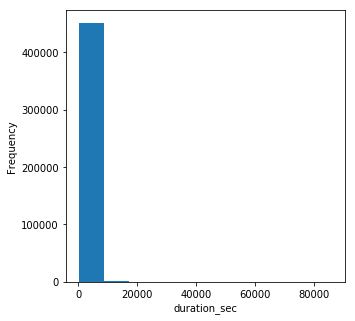

In [46]:
# histogram plot of duration_sec
plt.figure(figsize=(5,5))
trip_data_clean['duration_sec'].plot.hist()
plt.xlabel('duration_sec');

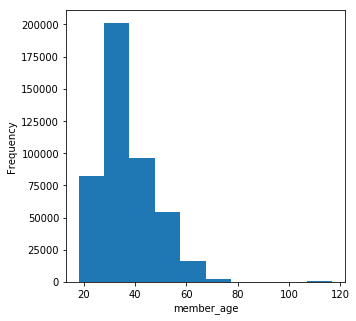

In [47]:
# histogram plot of member_age
plt.figure(figsize=(5,5))
trip_data_clean['member_age'].plot.hist();
plt.xlabel('member_age');

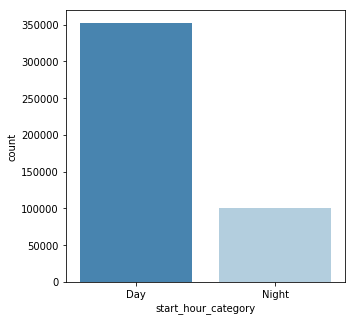

In [48]:
# count plot of start_hour_category
plt.figure(figsize=(5,5))
sb.countplot(data = trip_data_clean, x = 'start_hour_category', palette = "Blues_r");

> The result of the count plot of the hour category shows that a large amount of trips in the dataset consists of daytime trips significantly more than nighttime trips.

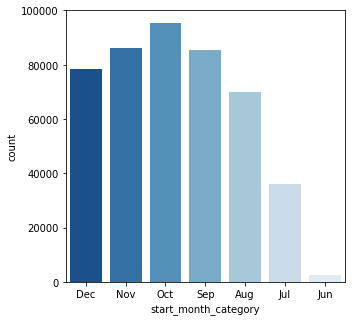

In [49]:
# count plot of start_month_category
plt.figure(figsize=(5,5))
sb.countplot(data = trip_data_clean, x = 'start_month_category', palette = "Blues_r");

> The result of the count plot of the month category shows that a large amount of trips in the dataset consists of trips that took place from Aug to Dec more than trips that took place in Jun and Jul.

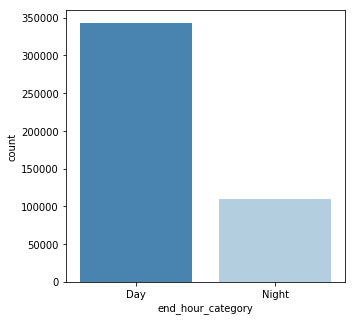

In [50]:
# count plot of end_hour_category
plt.figure(figsize=(5,5))
sb.countplot(data = trip_data_clean, x = 'end_hour_category', palette = "Blues_r");

> Similar to the start month category, the result of the count plot of the end hour category shows that a large amount of trips in dataset consists of daytime trips significantly more than nighttime trips.

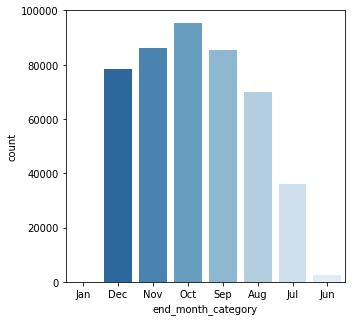

In [51]:
# count plot of end_month_category
plt.figure(figsize=(5,5))
sb.countplot(data = trip_data_clean, x = 'end_month_category', palette = "Blues_r");

> Similar to the start month category, the result of the count plot of the end month category shows that a large amount of trips in the dataset consists of trips that took place from Aug to Dec more than trips that took place in Jun and Jul.

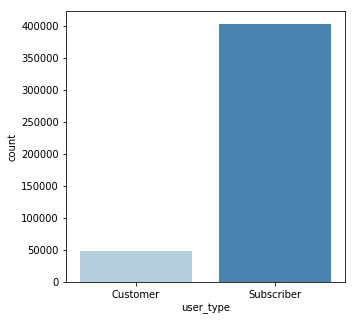

In [52]:
# count plot of user_type
plt.figure(figsize=(5,5))
sb.countplot(data = trip_data_clean, x = 'user_type', palette = "Blues");

> The result of the count plot shows that, in terms of user type, regular subscribers had a more notable larger amount of trips than customers.

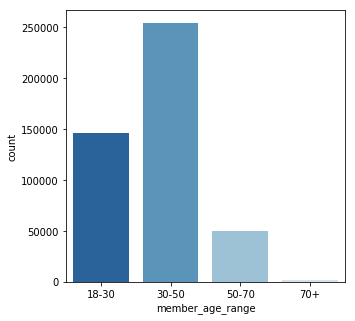

In [53]:
# count plot of member_age_range
plt.figure(figsize=(5,5))
sb.countplot(data = trip_data_clean, x = 'member_age_range', palette = "Blues_r");

> The result of the count plot shows that, in terms of age range, the largest amount of trips took place by those who were between the 30 to 50 years old while the second largest is the youngest age range 18 to 30.

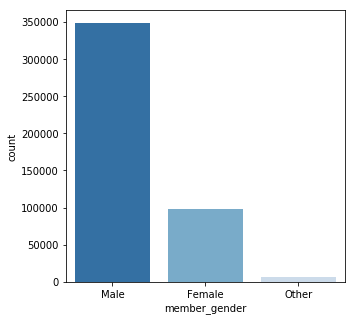

In [54]:
# count plot of member_gender
plt.figure(figsize=(5,5))
sb.countplot(data = trip_data_clean, x = 'member_gender', palette = "Blues_r");

> The result of the count plot, in terms of gender, is an interesting one. Unlike the expectation that all genders would have the same amount of trips, the plot shows that males had significantly larger amount of trips than other genders, females and other together.

## Bivariate Exploration

> In this section, I will explore the pairwise correlations present between the main variable and user categories.
> ### What segment of each category result in the longest duration in seconds?

In [55]:
# define numeric and categoric variables
numeric_vars = ['member_age', 'duration_sec']
categoric_vars = ['start_hour_category', 'end_hour_category', 'start_month_category', 'end_month_category', 'user_type', 'member_age_range', 'member_gender']

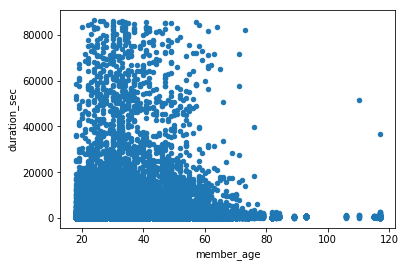

In [56]:
# scatter plot of member_age vs duration_sec
trip_data_clean.plot.scatter(x = 'member_age', y = 'duration_sec');

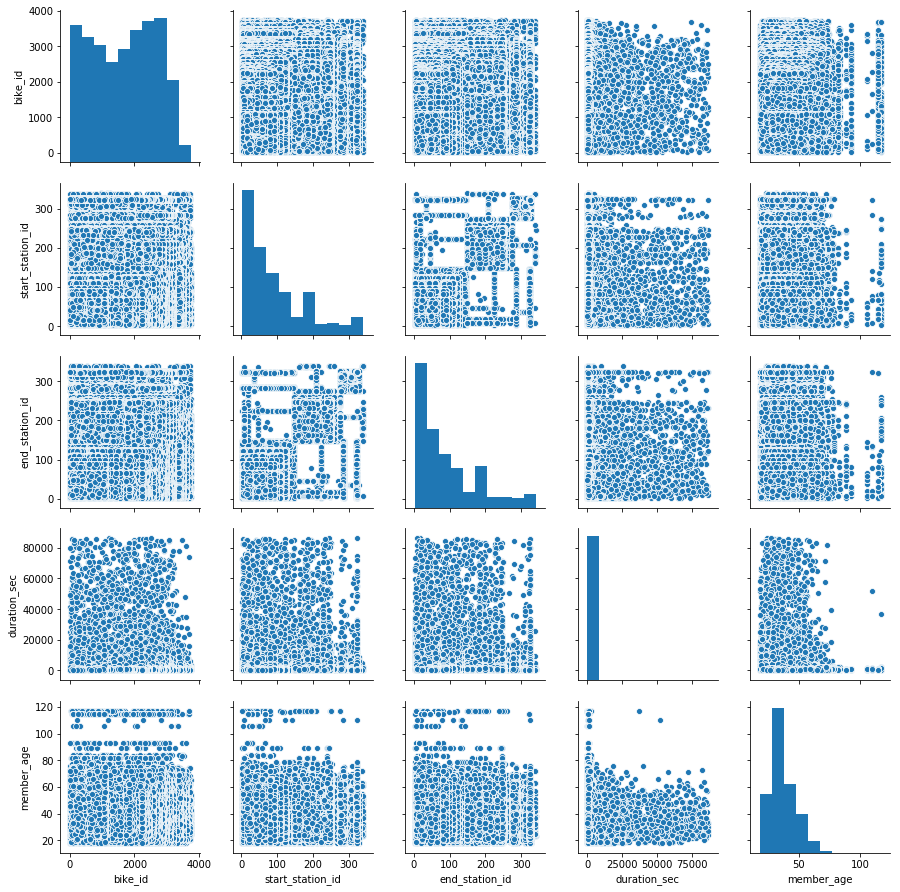

In [57]:
# pair plot of all numeric variables
sb.pairplot(trip_data_clean);

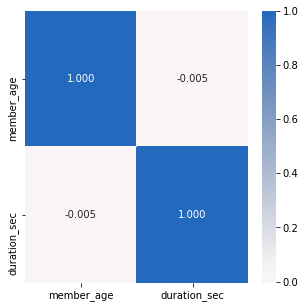

In [58]:
# heat map plot of  numeric_vars
plt.figure(figsize=(5,5))
sb.heatmap(trip_data_clean[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

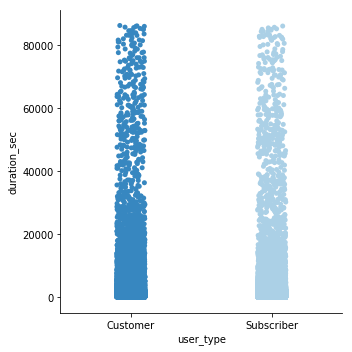

In [59]:
# cat plot of user_type vs duration_sec
sb.catplot(x = 'user_type', y = 'duration_sec', data = trip_data_clean, palette = 'Blues_r');

> The result of the cat plot, in terms of user type plotted against duration in seconds, suscribers had longer trips than customers although this cat plot does not show this clearly.

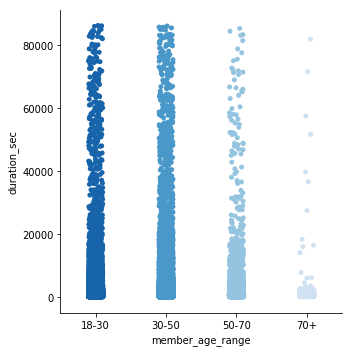

In [60]:
# cat plot of member_age_range vs duration_sec
sb.catplot(x = 'member_age_range', y = 'duration_sec', data = trip_data_clean, palette = 'Blues_r');

> The result of the cat plot, in terms of age range, shows that in general the longest durations took place by 30 to 50 years old members while the shortest durations took place by 70+ years old.

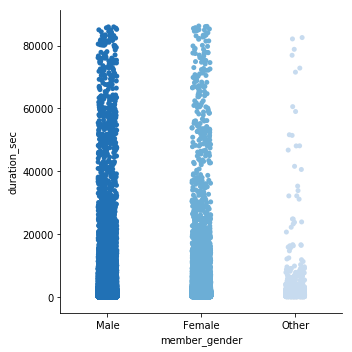

In [61]:
# cat plot of member_gender vs duration_sec
sb.catplot(x = 'member_gender', y = 'duration_sec', data = trip_data_clean, palette = 'Blues_r');

> The result of the cat plot, in terms of gender, shows that male members had longer trips than other genders.

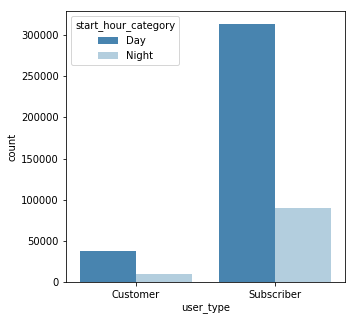

In [62]:
# count plot of user_type vs start_hour_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'user_type', hue = 'start_hour_category', palette = 'Blues_r');

> The result of the count plot, in terms of user type and hour category, shows that both customers and subscribers had a larger amount of trips during the day more than trips during the night.

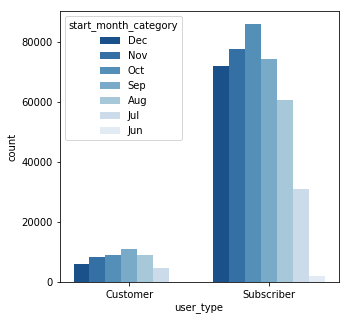

In [63]:
# count plot of user_type vs start_month_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'user_type', hue = 'start_month_category', palette = 'Blues_r');

> The result of the count plot, in terms of user type and month category, shows that subscribers had a significantly larger amount of trips during Aug to Dec more than Jun and Jul with the maximum taking place on Oct whereas the maximum taking place for customers in on Aug but the variation between the amount of trips is not significant.

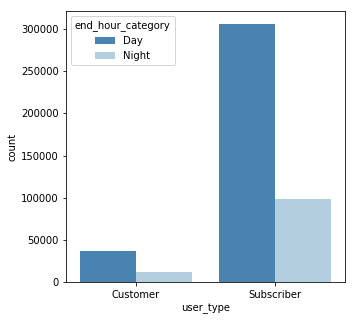

In [64]:
# count plot of user_type vs end_hour_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'user_type', hue = 'end_hour_category', palette = 'Blues_r');

> Similar to the start hour category, the result of the count plot, in terms of user type and hour category, shows that both customers and subscribers had a larger amount of trips during the day more than trips during the night.

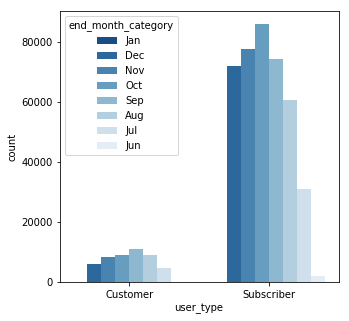

In [65]:
# count plot of user_type vs end_month_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'user_type', hue = 'end_month_category', palette = 'Blues_r');

> Similar to the start hour category, the result of the count plot, in terms of user type and month category, shows that subscribers had a significantly larger amount of trips during Aug to Dec more than Jun and Jul with the maximum taking place on Oct whereas the maximum taking place for customers in on Aug but the variation between the amount of trips is not significant.

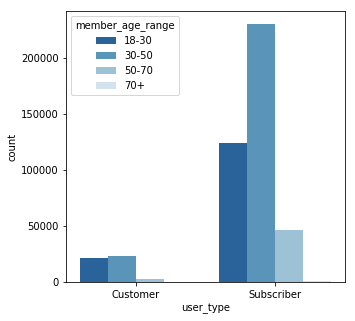

In [66]:
# count plot of user_type vs member_age_range
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'user_type', hue = 'member_age_range', palette = 'Blues_r');

> The result of the count plot, in terms of user type and age range, the amount of trips by subscribers in all age ranges is larger than the ones by customers. Subscribers of age ranges 18 to 30 and 30 to 50 had significantly more trips than older age ranges.

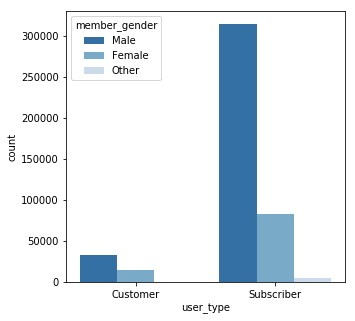

In [67]:
# count plot of user_type vs member_gender
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'user_type', hue = 'member_gender', palette = 'Blues_r');

> The result of the count plot, in terms of user type and gender, the amount of trips by subscribers of males and females is larger than the ones by customers. Male suscribers had significantly more trips than other genders.

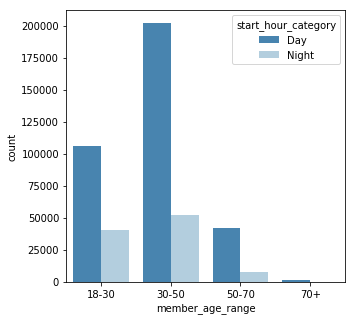

In [68]:
# count plot of member_age_range vs start_hour_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'member_age_range', hue = 'start_hour_category', palette = 'Blues_r');

> The result of the count plot, in terms of age range and hour category, shows that day trips by all age ranges were more than night trips by all age ranges. But day trips by those between 30 and 50 years old were significantly more than all hour categories in all other age ranges.

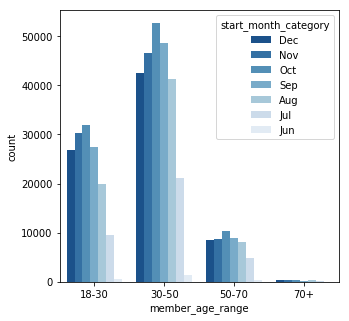

In [69]:
# count plot of member_age_range vs start_month_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'member_age_range', hue = 'start_month_category', palette = 'Blues_r');

> The result of the count plot, in terms of age range and month category, shows that the maximum amount of trips was in Oct in each of the age ranges 18 to 30, 30 to 50, and 50 to 70 while the age range 70+ had no noticable variation between the trips during the months.

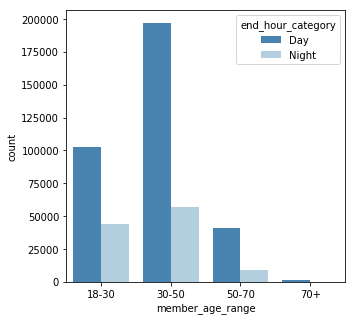

In [70]:
# count plot of member_age_range vs end_hour_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'member_age_range', hue = 'end_hour_category', palette = 'Blues_r');

> Similar to the start hour category, the result of the count plot, in terms of age range and hour category, shows that day trips by all age ranges were more than night trips by all age ranges. But day trips by those between 30 and 50 years old were significantly more than all hour categories in all other age ranges.

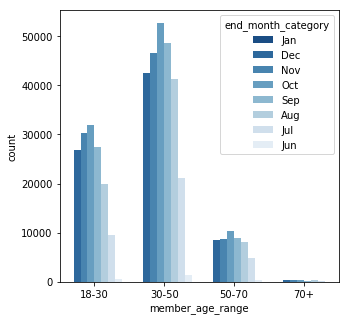

In [71]:
# count plot of member_age_range vs end_month_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'member_age_range', hue = 'end_month_category', palette = 'Blues_r');

> Similar to the start month category, the result of the count plot, in terms of age range and month category, shows that the maximum amount of trips was in Oct in each of the age ranges 18 to 30, 30 to 50, and 50 to 70 while the age range 70+ had no noticable variation between the trips during the months.

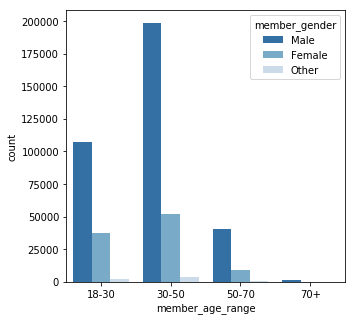

In [72]:
# count plot of member_age_range vs member_gender
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'member_age_range', hue = 'member_gender', palette = 'Blues_r');

> The result of the count plot, in terms of age range and gender, shows that male members had largest amount of trips in each age range. But trips by male members between 30 and 50 years old were significantly more than all age ranges and genders.

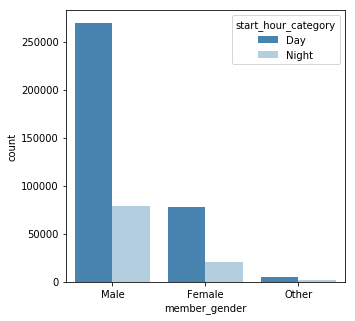

In [73]:
# count plot of member_age_range vs start_hour_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'member_gender', hue = 'start_hour_category', palette = 'Blues_r');

> The result of the count plot, in terms of gender and hour category, shows that trips that took place during the day is of a larger amount of all genders. But day trips by male members were significantly more than all genders.

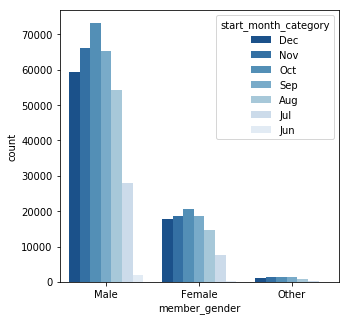

In [74]:
# count plot of member_age_range vs start_month_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'member_gender', hue = 'start_month_category', palette = 'Blues_r');

> The result of the count plot, in terms of gender and month category, shows that the maximum amount of trips was in Oct by male and female members while other gender had no noticable variation between the trips during the months.

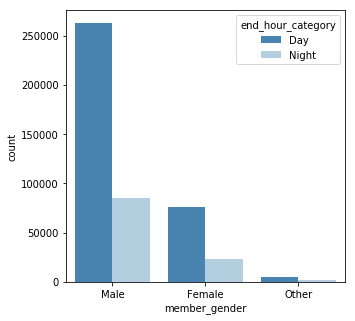

In [75]:
# count plot of member_age_range vs end_hour_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'member_gender', hue = 'end_hour_category', palette = 'Blues_r');

> Similar to the start hour category, the result of the count plot, in terms of gender and hour category, shows that trips that took place during the day is of a larger amount of all genders. But day trips by male members were significantly more than all genders.

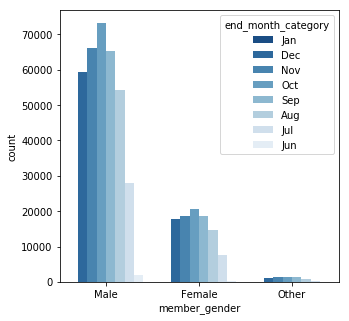

In [76]:
# count plot of member_age_range vs end_month_category
plt.figure(figsize = [5, 5])
sb.countplot(data = trip_data_clean, x = 'member_gender', hue = 'end_month_category', palette = 'Blues_r');

> Similar to the start month category, the result of the count plot, in terms of gender and month category, shows that the maximum amount of trips was in Oct by male and female members while other gender had no noticable variation between the trips during the months.

### How did the categories(s) of interest vary with other categories in the dataset?

> Similar to the univariate count plots done for user type, age range, and gender, the highest count is always, whether for the start or the end, occurs at daytime on Oct for the members of user type subscribers, the members who are between 30 and 50 years old, and the members who are male.

###  Were there any interesting relationships between the other categories (not the main categories(s) of interest)?

> Similar to the univariate plot results, it is interesting to see the age range 30 to 50 years old as the highest count comparing to the youngest generation in the dataset which is 18 to 30 years old. Also, the member gender was expected to be somewhat similar for all types but surprisingly male members are the highest in terms of the amount of trips.

## Multivariate Exploration

> In this section, I will explore how two user categories have a major effect and play into the relationship between them and duration.

> ### What two user categories of the data combined result in the longest durations in seconds?

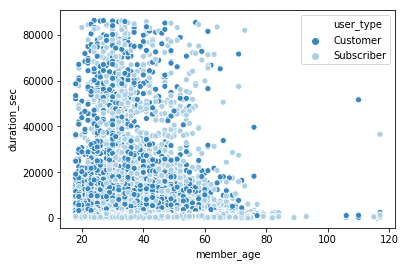

In [77]:
# scatter plot of member_age by duration and user_type
sb.scatterplot(data = trip_data_clean, x = 'member_age', y = 'duration_sec', hue = 'user_type', palette = 'Blues_r');

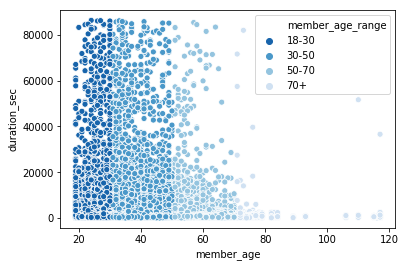

In [78]:
# scatter plot of member_age by duration and member_age_ragne
sb.scatterplot(data = trip_data_clean, x = 'member_age', y = 'duration_sec', hue = 'member_age_range', palette = 'Blues_r');

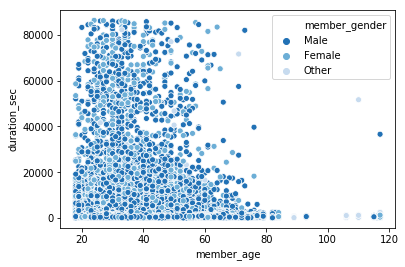

In [79]:
# scatter plot of member_age by duration and member_gender
sb.scatterplot(data = trip_data_clean, x = 'member_age', y = 'duration_sec', hue = 'member_gender', palette = 'Blues_r');

C:\Users\Ameen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


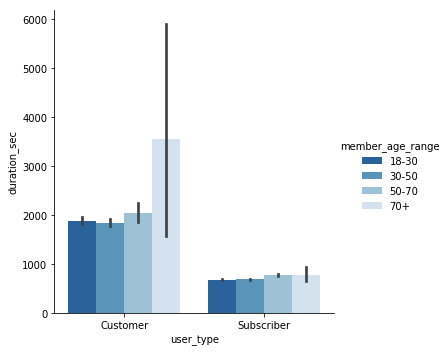

In [80]:
# cat plot of user_type by duration_sec and member_age_range
sb.catplot(x = 'user_type', y = 'duration_sec', hue = 'member_age_range', palette = 'Blues_r', kind = 'bar', data = trip_data_clean);

> The result of the cat plot, in terms of user type & age range and duration, shows that longer trips took place by customers of all age ranges but specially customers who are 70+ due to possible variation.

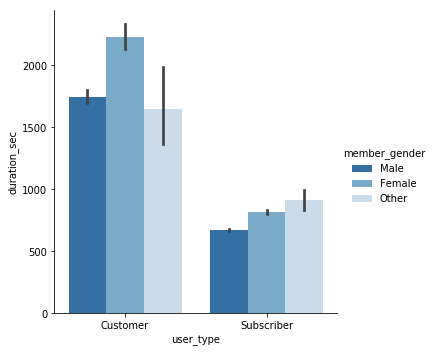

In [81]:
# cat plot of user_type by duration_sec and member_gender
sb.catplot(x = 'user_type', y = 'duration_sec', hue = 'member_gender', palette = 'Blues_r', kind = 'bar', data = trip_data_clean);

> The result of the cat plot, in terms of user type & gender and duration, shows that longer trips took place by customers of all genders specially females while other gender subscribers had the longer trips than male and female subscribers.

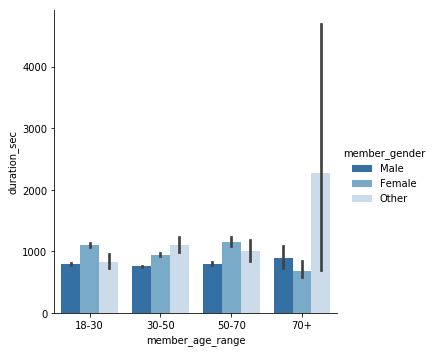

In [82]:
# cat plot of member_age_range by duration_sec and member_gender
sb.catplot(x = 'member_age_range', y = 'duration_sec',  hue = 'member_gender', palette = 'Blues_r', kind = 'bar', data = trip_data_clean);

> The result of the cat plot, in terms of age range & gender and duration, shows no significant variation between the combination of age ranges and gender except for other gender of 70+ years old who had longer trips due to possible variation.

### Are there categories that strengthened each other in terms of looking at your categorie(s) of interest?

> All categories but specially user type and gender shows strengthened the results specially in the multivariate plots because it shows different interpretations when combining a third element which is in some cases different from the expectations.


### Are there any interesting or surprising interactions between features?

> The multivariate section's results differ from expectations done prior to the beginning of the visualization stage. For example, What is interesting is that the univariate plots as well as the bivariate plots show a larger amount of trips by male memebrs but that does not guarantee a result of longer durations by the same gender.